In [1]:
# Modules that we need
from Vissim_env_class import environment, Load_Vissim
from MasterAC_Agent import MasterAC_Agent

%matplotlib inline
%load_ext autoreload
%autoreload 2

# MOVA 

In [2]:
Vissim \
= \
Load_Vissim(
Path_to_network = 'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_Single_Cross_Experiment\\Single_Cross_Straight\\',\
inpx_Filename = 'Single_Cross_StraightMOVA.inpx',\
layx_Filename = 'Single_Cross_Straight.layx',\
attempts=5)

fail
success


In [31]:
# Delete all previous simulation runs first:

data = []    

End_of_simulation = 3600
no_of_simulations = 1
demands = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
Vissim.SuspendUpdateGUI()
Vissim.Simulation.SetAttValue('SimPeriod', End_of_simulation)
Vissim.Simulation.SetAttValue('UseMaxSimSpeed', True)

for demand in demands :
    for simRun in Vissim.Net.SimulationRuns:
        Vissim.Net.SimulationRuns.RemoveSimulationRun(simRun)

    # change demand
    for V_input in Vissim.Net.VehicleInputs:
        V_input.SetAttValue('Volume(1)', demand)

    for cnt_Sim in range(no_of_simulations):
        Vissim.Simulation.SetAttValue('RandSeed', cnt_Sim + 1) # Note: RandSeed 0 is not allowed
        Vissim.Simulation.RunContinuous()

    data.append([demand, Vissim.Net.DelayMeasurements.GetMultiAttValues('VehDelay(Avg,Avg,All)')])
    print(data[-1]) 

KeyboardInterrupt: 

In [ ]:
f= open("MOVA_Demands.txt","w+")

f.write('demand, junction_1, junction_2, junction_3, junction_4')

for i in range(len(data)):
    f.write('%s , %f , %f , %f , %f ,\n' % (data[i][0],data[i][1][0][1],data[i][1][1][1],data[i][1][2][1],data[i][1][3][1]))

f.close()

# AC Agent

In [53]:
Vissim \
= \
Load_Vissim(
Path_to_network = 'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_Single_Cross_Experiment\\Single_Cross_Straight\\',\
inpx_Filename = 'Single_Cross_Straight.inpx',\
layx_Filename = 'Single_Cross_Straight.layx',\
attempts=5,
Vissim = None)

fail
fail
fail
fail
success


In [ ]:
gamma = 0.95
alpha = 0.00001


value = 0.5
entropy = 0.5
n_step_size = 16
state_size = [5]
reduce_entropy_every = 100
Random_Seed = 1

# for the monitoring
horizon = 50
n_sample = 10

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory=\
'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\
\\Documents\\MLforFlowOptimisation\\NSW_Single_Cross_Experiment\\'

#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Straigth_AC"



# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
        'queues_counter_ID' : [1,2,3,4]}
        },
 'demand' : { 'default' : [800, 800, 800, 800],
             
             0 : [800, 800, 800, 800],
             1 : [800, 800, 800, 800],
             2 : [800, 800, 800, 800],
             3 : [800, 800, 800, 800],
             4 : [800, 800, 800, 800],
             5 : [800, 800, 800, 800],
             6 : [800, 800, 800, 800],
             7 : [800, 800, 800, 800],
             8 : [800, 800, 800, 800],
             9 : [800, 800, 800, 800]
            }
 
}

In [ ]:
Single_Cross_Straight_MultiAC_Agents\
= MasterAC_Agent(model_name, 
                 vissim_working_directory, 
                 sim_length, 
                 Single_Cross_Straight_dictionary,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample,
                save_location = 'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Desktop')

In [ ]:
Single_Cross_Straight_MultiAC_Agents.load(episode=100,
                                          best=False, 
load_location='C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_Single_Cross_Experiment\\Single_Cross_Straight\\Agents_Results\\Neil_Results\\Neils_Good_Agents\\Oct24'
                                         )

In [ ]:
data = []    

End_of_simulation = 3600
no_of_simulations = 1
demands = [200, 400, 600, 800, 1000, 1200]

Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
Vissim.SuspendUpdateGUI()
Vissim.Simulation.SetAttValue('SimPeriod', End_of_simulation)
Vissim.Simulation.SetAttValue('UseMaxSimSpeed', True)

for demand in demands :
    for simRun in Vissim.Net.SimulationRuns:
        Vissim.Net.SimulationRuns.RemoveSimulationRun(simRun)
    
    for i in range(10):
        Single_Cross_Straight_dictionary['demand'][i] = [demand,demand,demand,demand]
    
    Single_Cross_Straight_MultiAC_Agents\
    = MasterAC_Agent(model_name, 
                     vissim_working_directory, 
                     sim_length, 
                     Single_Cross_Straight_dictionary,
                     n_step_size, gamma, alpha, entropy, value, 
                     Random_Seed = Random_Seed, timesteps_per_second = 1, 
                     Session_ID = Session_ID, verbose = True, 
                     horizon = horizon, n_sample = n_sample,
                     save_location = 'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Desktop')
    
    Single_Cross_Straight_MultiAC_Agents.load(episode=100,
                                              best=False, 
                                              load_location='C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_Single_Cross_Experiment\\Single_Cross_Straight\\Agents_Results\\Neil_Results\\Neils_Good_Agents\\Oct24'
                                         )
    
    (Episode_Queues, 
     Cumulative_Episode_Delays,
     Cumulative_Episode_stop_Delays, 
     Cumulative_Totale_network_delay,
     Cumulative_Totale_network_stop_delay) = Single_Cross_Straight_MultiAC_Agents.test(vissim=Vissim)
    
    data.append([demand, Vissim.Net.DelayMeasurements.GetMultiAttValues('VehDelay(Avg,Avg,All)')])
    print(data[-1]) 
    

In [ ]:
data

In [ ]:
f= open("AC_Demands.txt","w+")

f.write('demand, junction_1, junction_2, junction_3, junction_4\n')

for i in range(len(data)):
    f.write('%s , %f , %f , %f , %f ,\n' % (data[i][0],data[i][1][0][1],data[i][1][1][1],data[i][1][2][1],data[i][1][3][1]))

f.close()

# DuelingDQN

In [2]:
Vissim \
= \
Load_Vissim(
Path_to_network = 'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_Single_Cross_Experiment\\Single_Cross_Straight\\',\
inpx_Filename = 'Single_Cross_Straight.inpx',\
layx_Filename = 'Single_Cross_Straight.layx',\
attempts=5,
Vissim = None)

fail
fail
fail
fail
fail


In [45]:
# General Libraries
import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd
import json

In [46]:
from MasterDQN_Agent import MasterDQN_Agent

In [47]:
model_name  = 'Single_Cross_Straight'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory='C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDQN"
Session_ID = "Single_Cross_Straigth_DuelingDQN20c0"

# all controller actions
# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4]  }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

## DQN Hyperaramenters
episodes = 300
copy_weights_frequency = 10

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

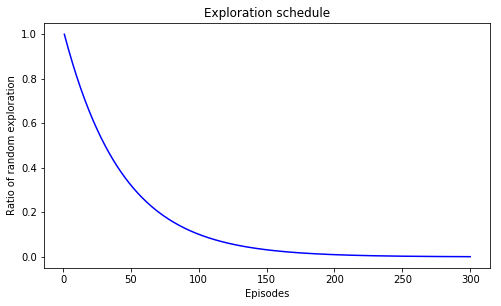

In [48]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 1

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [49]:
Single_Cross_Straight_MultiDQN_Agents =\
MasterDQN_Agent(model_name, 
                vissim_working_directory, 
                sim_length, 
                Single_Cross_Straight_dictionary,
                'default_actions',
                gamma, alpha, 
                agent_type, 
                memory_size, 
                PER_activated, 
                batch_size, 
                copy_weights_frequency, 
                epsilon_sequence,
                Random_Seed = Random_Seed, 
                timesteps_per_second = 1, 
                Session_ID = Session_ID, 
                verbose = True)

INTERSECTION 0: SETTING UP AGENT
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_59 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
dense_348 (Dense)               (None, 24)           144         input_59[0][0]                   
__________________________________________________________________________________________________
dense_349 (Dense)               (None, 24)           600         dense_348[0][0]                  
__________________________________________________________________________________________________
dense_352 (Dense)               (None, 24)           600         dense_349[0][0]                  
____________________________________________________________________________

In [50]:
Single_Cross_Straight_MultiDQN_Agents.load(300,False) 

Loading Pre-Trained Agent 0, Architecture, Optimizer and Memory.
Items successfully loaded.


In [51]:
data = []    

End_of_simulation = 3600
sim_length = 3600
no_of_simulations = 1
demands = [200, 400, 600, 800, 1000, 1200]

Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
Vissim.SuspendUpdateGUI()
Vissim.Simulation.SetAttValue('SimPeriod', End_of_simulation)
Vissim.Simulation.SetAttValue('UseMaxSimSpeed', True)

for demand in demands :
    for simRun in Vissim.Net.SimulationRuns:
        Vissim.Net.SimulationRuns.RemoveSimulationRun(simRun)
    
    for i in range(10):
        Single_Cross_Straight_dictionary['demand'][i] = [demand,demand,demand,demand]
    
    Single_Cross_Straight_MultiDQN_Agents =\
    MasterDQN_Agent(model_name, 
                    vissim_working_directory, 
                    sim_length, 
                    Single_Cross_Straight_dictionary,
                    'default_actions',
                    gamma, alpha, agent_type, memory_size, PER_activated, 
                    batch_size, copy_weights_frequency, epsilon_sequence,
                    Random_Seed = Random_Seed, timesteps_per_second = 1, 
                    Session_ID = Session_ID, verbose = True)


    Single_Cross_Straight_MultiDQN_Agents.load(300,False) 
    
    for V_input in Vissim.Net.VehicleInputs:
        V_input.SetAttValue('Volume(1)', demand)
    
    Single_Cross_Straight_MultiDQN_Agents.test(vissim=Vissim)
    
    data.append([demand, Vissim.Net.DelayMeasurements.GetMultiAttValues('VehDelay(Avg,Avg,All)')])
    print(data[-1]) 

INTERSECTION 0: SETTING UP AGENT
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_61 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
dense_360 (Dense)               (None, 24)           144         input_61[0][0]                   
__________________________________________________________________________________________________
dense_361 (Dense)               (None, 24)           600         dense_360[0][0]                  
__________________________________________________________________________________________________
dense_364 (Dense)               (None, 24)           600         dense_361[0][0]                  
____________________________________________________________________________

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_67 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
dense_396 (Dense)               (None, 24)           144         input_67[0][0]                   
__________________________________________________________________________________________________
dense_397 (Dense)               (None, 24)           600         dense_396[0][0]                  
__________________________________________________________________________________________________
dense_400 (Dense)               (None, 24)           600         dense_397[0][0]                  
__________________________________________________________________________________________________
dense_398 

In [58]:
Vissim.Net.DelayMeasurements.GetMultiAttValues('VehDelay(Avg,Avg,All)')

((1, 26.85172764285942),
 (2, 23.56743042885985),
 (3, 23.217939190141117),
 (4, 25.33669116516805))

In [57]:
for V_input in Vissim.Net.VehicleInputs:
        print(V_input.AttValue('Volume(1)'))

800.0
800.0
800.0
800.0


In [52]:
data

[[200,
  ((1, 3.446401593066048),
   (2, 14.330811627134999),
   (3, 2.6801913407106555),
   (4, 15.304578081502383))],
 [400,
  ((1, 5.741786189600002),
   (2, 10.346979165307832),
   (3, 6.221527660235319),
   (4, 11.14344142684204))],
 [600,
  ((1, 9.631011009121622),
   (2, 11.013356009092082),
   (3, 8.613330235254285),
   (4, 11.640969790919923))],
 [800,
  ((1, 18.766924461974934),
   (2, 18.029822993421433),
   (3, 15.089979023624753),
   (4, 18.03209810363021))],
 [1000,
  ((1, 68.9405323046292),
   (2, 72.88241274202586),
   (3, 58.03869507914232),
   (4, 88.01939730511737))],
 [1200,
  ((1, 56.1714109208936),
   (2, 108.72114369795678),
   (3, 57.066941143395674),
   (4, 111.7251276275101))]]

In [56]:
for demand in demands :
    for simRun in Vissim.Net.SimulationRuns:
        Vissim.Net.SimulationRuns.RemoveSimulationRun(simRun)